# 1. Introduction

In this notebook, we are trying to predict the future monthly prices of avocados in different U.S. regions, based on prices and trading data. The Avocado prices can be very different in different regions since the averge storage is only 5 days; however, as a 'not-eazy-to-grow' fruit, not all places in the U.S. get good soil/weather conditions for massive growing. Thus, to keep the freshness, the retailers and growners have to cost more to improve the transportation efficiency. As a result, to better manage supply chains and cost management, predicting prices for Avocado would be crucial for retailers and avocado growers. Also, for people who really love avocado, they can take advantage of the predicted prices and make correponding actions. This project will predict the avocado prices based on the general sales data, regressors (e.g., Decision Tree, Random Forest, XGboost, and etc).

# 2. Exploring the Data

Dataset we will be using is derived from Hass Avocado Board (https://hassavocadoboard.com/), an organisation focusing on collecting avocado data and promoting sales in the US. The data is the full copy from the website with all features avaliable. Before starting the analysis, we first install and load all packages used in this notebook.

In [1]:
# Installing xgboost
!pip install xgboost


In [2]:
!pip install linearmodels

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from pprint import pprint
%matplotlib inline
# setting the general visualization style
sns.set_style('whitegrid')

# feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor

# model selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# machine learning visualization
from xgboost import plot_tree
from sklearn import tree

# Tuning and Esembling
from sklearn.model_selection import GridSearchCV        
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import VotingRegressor

# ignoring warnings in the notebook
import warnings 
warnings.filterwarnings('ignore') 

# To display full output 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2.1. Examing the Features

In [4]:
# Import the dataset 
df = pd.read_csv("C:/Users/Administrator/Desktop/avocado.csv") 
# view the data
df.head()
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# checking the shape
print('shape of the data:',df.shape)

shape of the data: (18249, 14)


In [6]:
# Identifying the meaning of variables in the dataset:

# Date - The date of the observation
# Total volumn - total avocado sold
# AveragePrice - the average price of a single avocado
# type - type of avocado
# year - the year
# Region - the city or region of the observation

# 4046 - Total number of avocados with PLU 4046 sold  (Small Hass avocado)
# 4225 - Total number of avocados with PLU 4225 sold  (Large Hass avocado)
# 4770 - Total number of avocados with PLU 4770 sold  (XLarge Hass avocado)

# Total Bags - Total bags of avocados sold = Small Bags + Large Bags + XLarge Bags
# Total Volume - Total number of avocados sold = Total Bags 4046 sold + 4225 sold + 4770 sold 

### 2.1.1 Identifying the Type of Features

In [7]:
# Showing types of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### 2.1.2 Summary Stats

In [8]:
# descriptive statistics summary
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


### 2.1.3. Checking for Missing Values

In [9]:
# Identifying the No.missing values and presenting the results as percentage
percentage_missing = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(percentage_missing,2)) + "%")

The number of missing entries before cleaning: 0.0%


### 2.1.4. Checking Features with 'Object' type.

In [10]:
# counting the 'type' feature by its value
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [11]:
# checking what is in the 'region' feature
df['region'].value_counts()

Portland               338
HarrisburgScranton     338
GreatLakes             338
Tampa                  338
CincinnatiDayton       338
Charlotte              338
BuffaloRochester       338
Roanoke                338
Pittsburgh             338
Houston                338
LosAngeles             338
Southeast              338
StLouis                338
RichmondNorfolk        338
NorthernNewEngland     338
SouthCentral           338
Detroit                338
Jacksonville           338
Sacramento             338
West                   338
SanDiego               338
MiamiFtLauderdale      338
SanFrancisco           338
Boston                 338
Plains                 338
Northeast              338
Louisville             338
GrandRapids            338
Albany                 338
TotalUS                338
Midsouth               338
Seattle                338
California             338
Chicago                338
Boise                  338
NewOrleansMobile       338
RaleighGreensboro      338
H

<div class="alert alert-success">
<b> Insights from the Section 2.1. :</b> 

- No Null value is presented. 
- Some features need to be reformatted/renamed/deleted. (e.g., Date, 4046, 4225, 4770, and 'Unnamed')
- For the type of Avocado, we only have the organic and conventional types.
- For regions data, there are 338 observations from each region, sample seems balanced; however, there are 54 U.S. regions while some are sub-regions of the other regions, i.e, LosAngeles-California.

</div>

## 2.2. Preparing Data for Exploratory Analysis

From above, we can see several problems in our dataframe. We need to do some simple cleaning so we can produce neat visualizations.

In [12]:
# drop meaningless column 
df = df.drop(['Unnamed: 0'], axis = 1)
# rename unclear column names
df = df.rename(index=str, columns={"4046" : "Small_Hass", 
                                   "4225" : "Large_Hass",
                                   "4770" : "XLarge_Hass" })
# reformatting the Date column
df['Date'] =pd.to_datetime(df.Date)
# sort the df by date
df.sort_values(by=['Date'], inplace=True, ascending=True)

Also, we need to remove the larger and overlapping regions otherwise they may bias our analysis.

In [13]:
# Removing rows contains the following regions
RegionsRemove = ['California', 'GreatLakes', 
                   'Midsouth', 'NewYork', 'Northeast', 
                   'SouthCarolina', 'Plains', 'SouthCentral', 
                   'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(RegionsRemove)]

In [14]:
# Checking the updated dataframe
df.head()
df.tail()

,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
2807,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.0,conventional,2015,WestTexNewMexico


,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
17841,2018-03-25,1.75,5518.73,171.22,806.65,3.93,4536.93,2944.89,1592.04,0.00,organic,2018,Jacksonville
18057,2018-03-25,1.42,17340.49,295.16,3478.97,81.25,13485.11,12149.49,1335.62,0.00,organic,2018,RichmondNorfolk
8850,2018-03-25,1.32,429132.50,258217.83,25970.97,1426.07,143517.63,90870.28,52357.35,290.00,conventional,2018,Orlando
17649,2018-03-25,1.74,38441.23,27.25,2031.54,0.00,36382.44,29466.95,6915.49,0.00,organic,2018,Boston
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago


## 2.3. Visualizing the Data

Now we are ready to make visualizations. Since our focus is to predict the price of Avocado, our visualizations would be focusing on the relationship between prices and the other features.

### 2.3.1. The Distributions

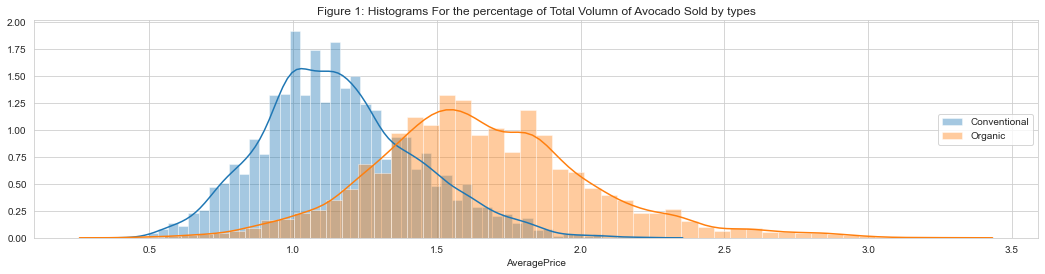

In [15]:
# Figure 1: histograms for convential and organic avocade price
df_conventional = df[df['type'] == 'conventional']
# df_conventional.shape
df_organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice']) # histogram 1
sns.distplot(df_organic['AveragePrice']) # histogram 2
# labeling
ax.set(title='Figure 1: Histograms For the percentage of Total Volumn of Avocado Sold by types')
ax.legend(['Conventional','Organic'], loc="right")
plt.show();

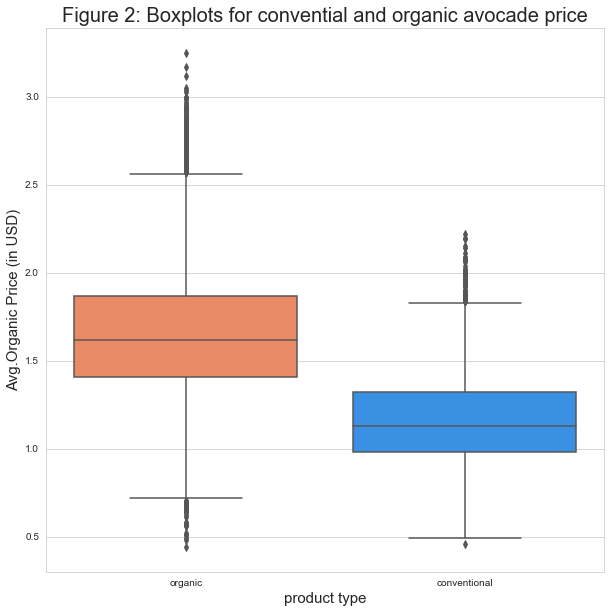

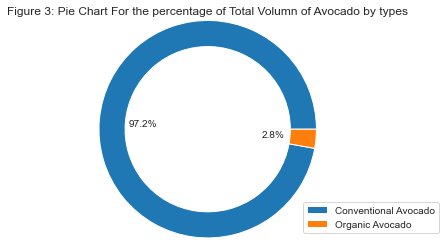

In [16]:
# Figure 2: Boxplots for convential and organic avocade price
plt.figure(figsize = (10,10))
# setting colours manually
colours = {"organic": "coral",
           "conventional": "dodgerblue"}
# Setting up the boxplot
product_type = sns.boxplot(y='AveragePrice', x='type', 
                 data=df,    
                 palette=colours) 
# formatting
product_type.axes.set_title("Figure 2: Boxplots for convential and organic avocade price",fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# adding labels
product_type.set_ylabel("Avg.Organic Price (in USD)",fontsize=15)
product_type.set_xlabel("product type",fontsize=15);

###############################################################################
# Figure 3: Pie Chart For %Total Volumn by types
# Calculating the total volumn by types
figure2=pd.DataFrame(df.groupby("type")["Total Volume"].sum()).transpose()
# Setting up the pie chart
fig, ax = plt.subplots()
ax.pie(figure2, radius=1.25,autopct='%1.1f%%',
       wedgeprops=dict(width=0.3))
# labeling
ax.set(aspect="equal", title='Figure 3: Pie Chart For the percentage of Total Volumn of Avocado by types')
labels=['Conventional Avocado','Organic Avocado']
ax.legend(labels,
          loc="lower center",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show();

<div class="alert alert-success">
<b>Insights from Figure 1, 2, and 3:</b> 

From figure 1, both avocado types are roughly bell-shaped, but organic avocados tend to have higher average prices, probably because:
    
- the cultivation is more expensive 
- the percentage volume is very low (see Figure 3) due to the its low productivity nature.
- people are paying more for healthier avocado. 
    
However, the distribution of organic avocado is much broader than the conventional one which might be the result of different regions, for example, organic can be more popular and expensive in large cities than where they were grown. Thus, we are going to discover the relationship between prices and regions next.

</div>

### 2.3.2. The Correlations

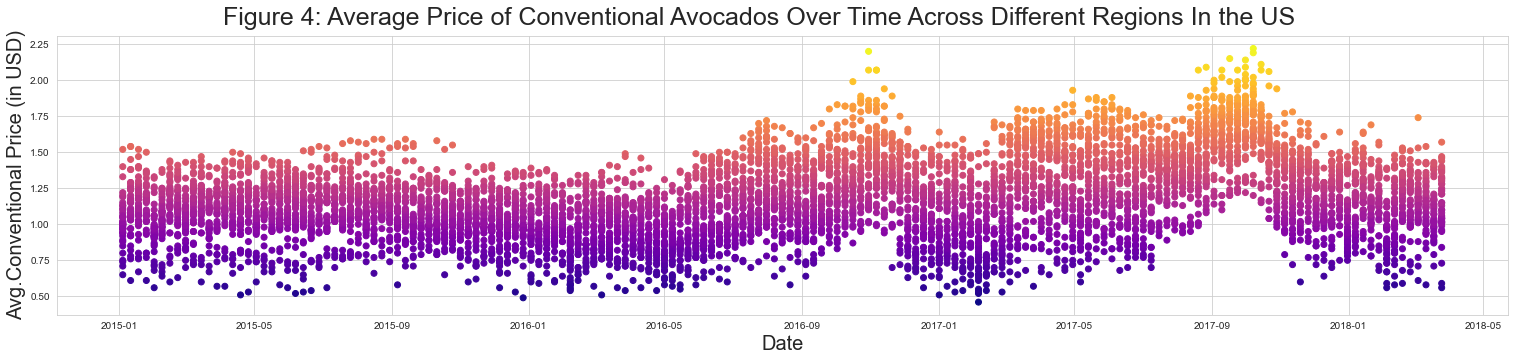

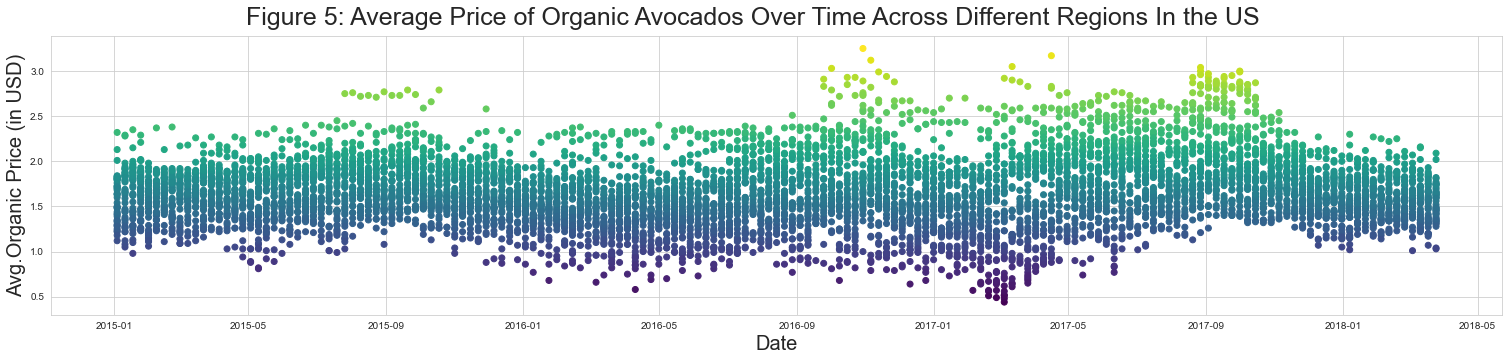

In [17]:
# Figure 4: Average price of Conventional Average Pirce Over Time Across Different Regions In the US
# setting x and y axis
conv = df['type']== 'conventional'
dates = df[conv]['Date'].tolist()
avgPrices = df[conv]['AveragePrice'].tolist()
#formatting
plt.rc('figure', titlesize=50)
fig4 = plt.figure(figsize = (26, 5))
fig4.subplots_adjust(top=0.9)
ax = fig4.add_subplot(111)
# setting up the plot 
plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
# adding labels
fig4.suptitle('Figure 4: Average Price of Conventional Avocados Over Time Across Different Regions In the US', fontsize=25)
ax.set_xlabel('Date',fontsize = 20)
ax.set_ylabel('Avg.Conventional Price (in USD)', fontsize = 20)
plt.show();

########################################################################
# Figure 5: Average Price of Organic Avocados Over Time Across Different Regions In the US
# setting x and y axis
organ = df['type']== 'organic'
dates = df[organ]['Date'].tolist()
avgPrices = df[organ]['AveragePrice'].tolist()
# formatting
plt.rc('figure', titlesize=50)
fig5 = plt.figure(figsize = (26, 5))
fig5.subplots_adjust(top=0.9)
ax = fig5.add_subplot(111)
# setting up the plot 
plt.scatter(dates, avgPrices, c=avgPrices, cmap='viridis')
# adding labels
fig5.suptitle('Figure 5: Average Price of Organic Avocados Over Time Across Different Regions In the US', fontsize=25)
ax.set_xlabel('Date',fontsize = 20)
ax.set_ylabel('Avg.Organic Price (in USD)', fontsize = 20)
plt.show();

<div class="alert alert-success">
<b>Insights from Figure 4 and 5:</b> 

- From above, we can see that the avocado prices are indeed very different across different regions
- The prices of conventional avocado seem to experence several surge and plunge during the period from 2016 to 2018.
    
By check the facts, we know that there was a shoratge known as **The great avocado shortage of 2016** due to strikes and drought that destroys avocado groves. We also see the same kind if surge in late 2017, due to an unexpected strom. 

Hence, we are interested in taking a closer look at how prices are related to each region.
</div>

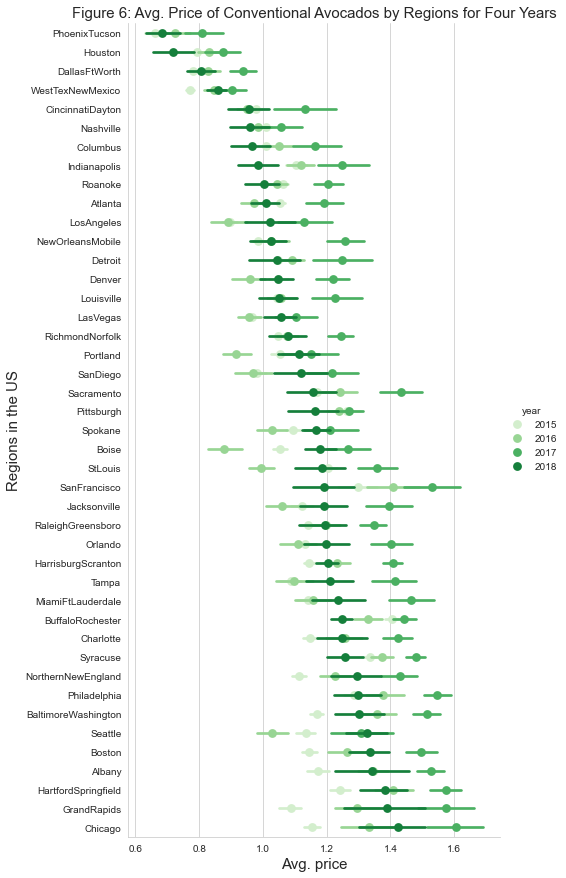

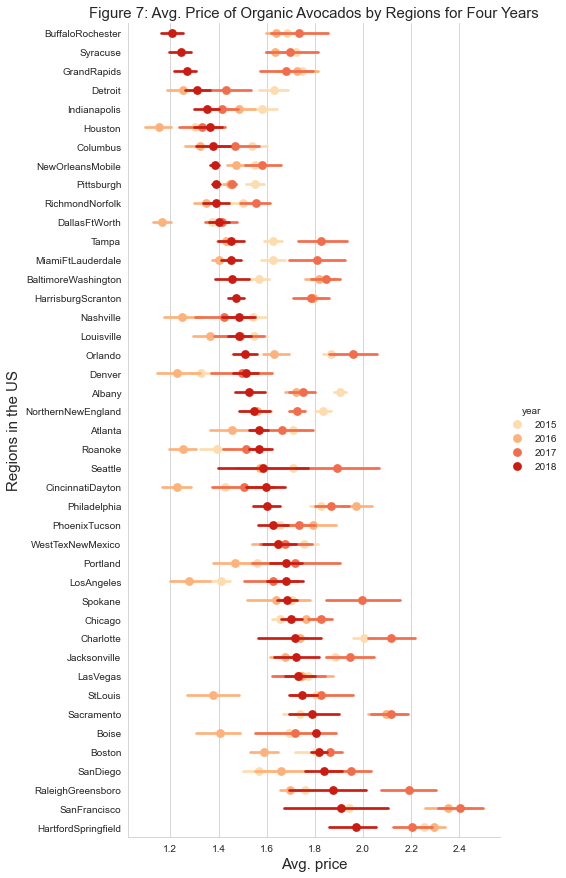

In [18]:
# Figure 6: Average Price of Conventional Avocados for Different Regions 
# reordering the regions from the lowest to the highest using the avg. price data in 2018
order_conv = (df[conv & (df['year']==2018)]
         .groupby('region')['AveragePrice']
         .mean()
         .sort_values()
         .index
)
# setting up the factor plot
figure6=sns.factorplot('AveragePrice','region',data=df[conv],
                   hue='year',
                   size=12,
                   aspect=0.6,
                   palette='Greens',
                   order=order_conv,
                   join=False,
)
# labeling
plt.title("Figure 6: Avg. Price of Conventional Avocados by Regions for Four Years", fontsize =15)
plt.xlabel('Avg. price', fontsize = 15) 
plt.ylabel('Regions in the US', fontsize = 15)
plt.show();

################################################################
# Figure 7: Average Price of Organic Avocados for Different Regions 
# reordering the regions from the lowest to the highest using the avg. price data in 2018
order_organ = (df[organ & (df['year']==2018)]
         .groupby('region')['AveragePrice']
         .mean()
         .sort_values()
         .index
)
# setting up the factor plot
figure7 = sns.factorplot('AveragePrice','region',data=df[organ],
                   hue='year',
                   size=12,
                   aspect=0.6,
                   palette='OrRd',
                   order=order_organ,
                   join=False,
)
# labeling
plt.title("Figure 7: Avg. Price of Organic Avocados by Regions for Four Years", fontsize =15)
plt.xlabel('Avg. price', fontsize = 15) 
plt.ylabel('Regions in the US', fontsize = 15)
plt.show();


<div class="alert alert-success">
<b>Insights from Figure 6 and 7 :</b> 

- From above we see that Phoenix&Tuscon have some of the cheapest conventional avocados around
- Avocados in Chicago have the highest price. 
- The prices are very stable for some cities across 4 years (e.g., LasVegas) while some are not (e.g., SanFrancisco).
- For most of the regions, the price variation of the oganic avocado from year to year is much more than that of the conventional one.


</div>

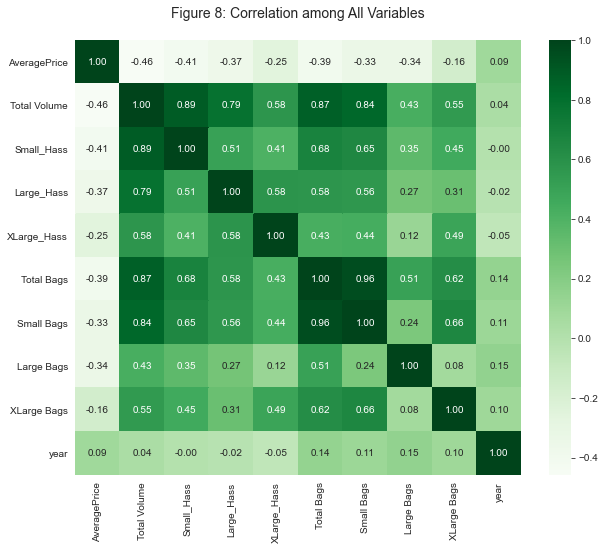

In [19]:
# Figure 8: correlation overview on the dataset
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'Greens')
# labeling
plt.title('Figure 8: Correlation among All Variables\n', fontsize = 14)
plt.show();

<div class="alert alert-success">
<b>Insights from Figure 8:</b> 

From the heatmap, we find high correlation between those pairs: 

- small bags & total volume  (0.84) 
- small hass & total volume  (0.89)   
    
These two represent that customers tend to buy more Small Hass avocados (single) and small bags of avocado, which makes sense.

- total bags & total volume  (0.87)        
- total bags & small bags   (0.96) 

Since total Bags is highly correlated with total tolume and Small Bags, we can say the majority of sales for bagged avocado is from the small bags.

</div>

# 3. Feature Engineering For Machine Learning Models 

In this section, we modify our data so as to make them suitable for the models. From the table below, we can see 3 categorical features, namely, Type, Year, and Region, and encoding will be performed on each of them. Also, for the time-series feature, the Date, to save computational cost, it is advised to transform it to a monthly basis.

The plan for the encoding:
- Type:	OneHot - as only 2 unique values here
- Year:	Label - to keep the ordinal importance
- Region: Target - the effect of each Region on Average Price will be considered, due to high cardinality.
- Month: Target - the effect of each Month on Average Price will be considered, due to high cardinality. 

In [20]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          14531 non-null  datetime64[ns]
 1   AveragePrice  14531 non-null  float64       
 2   Total Volume  14531 non-null  float64       
 3   Small_Hass    14531 non-null  float64       
 4   Large_Hass    14531 non-null  float64       
 5   XLarge_Hass   14531 non-null  float64       
 6   Total Bags    14531 non-null  float64       
 7   Small Bags    14531 non-null  float64       
 8   Large Bags    14531 non-null  float64       
 9   XLarge Bags   14531 non-null  float64       
 10  type          14531 non-null  object        
 11  year          14531 non-null  int64         
 12  region        14531 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.2+ MB


## 3.1. Dropping Unsuitable Features

<div class="alert alert-warning"> 
<b>Be carefull that Total Bags and Total Volume are the sum of the other features:</b>
    
- Total Bags = Small Bags + Large Bags + XLarge Bags

- Total Volume = Small Hass + Large Hass + XLarge Hass + Total Bags

To avoid multicollinearity, we will drop Total Bags and Total Volume.
</div>

In [21]:
# Dropping features
df = df.drop(['Total Bags'], axis = 1)
df = df.drop(['Total Volume'], axis = 1)

## 3.2. Data Transformation and Encoding

In [22]:
# Extracting month from date column.
df['Month']=df['Date'].apply(lambda x:x.month)
# dropping the date column
df = df.drop('Date',axis=1)
# renaming month data in order to create dummies
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',
                         4:'APRIL',5:'MAY',6:'JUNE',
                         7:'JULY',8:'AUG',9:'SEPT',
                         10:'OCT',11:'NOV',12:'DEC'})

In [23]:
df.head()

,AveragePrice,Small_Hass,Large_Hass,XLarge_Hass,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9593,1.49,1189.35,15628.27,0.00,905.55,0.00,0.0,organic,2015,Chicago,JAN
10009,1.68,161.68,206.96,0.00,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,JAN
1819,1.52,3013.04,35456.88,1561.70,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,JAN
9333,1.64,1.27,1129.50,0.00,186.67,187.68,0.0,organic,2015,Boise,JAN
2807,0.75,426878.87,147958.43,15267.89,165202.22,2811.54,0.0,conventional,2015,WestTexNewMexico,JAN


### 3.2.1. Converting Categorical Features to Dummies

In [24]:
# Creating dummy variables
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)
# creating a new df for features
df_fea = pd.concat([df.loc[:,'Small_Hass':'XLarge Bags'],dummies],axis=1)
# Creating the target variable
target = df['AveragePrice']
df_fea.head()

,Small_Hass,Large_Hass,XLarge_Hass,Small Bags,Large Bags,XLarge Bags,year,region_Atlanta,region_BaltimoreWashington,region_Boise,...,Month_DEC,Month_FEB,Month_JAN,Month_JULY,Month_JUNE,Month_MARCH,Month_MAY,Month_NOV,Month_OCT,Month_SEPT
9593,1189.35,15628.27,0.00,905.55,0.00,0.0,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10009,161.68,206.96,0.00,2528.08,0.00,0.0,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1819,3013.04,35456.88,1561.70,11264.80,3660.38,0.0,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9333,1.27,1129.50,0.00,186.67,187.68,0.0,2015,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2807,426878.87,147958.43,15267.89,165202.22,2811.54,0.0,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
# double-checking the features
df_fea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Small_Hass                  14531 non-null  float64
 1   Large_Hass                  14531 non-null  float64
 2   XLarge_Hass                 14531 non-null  float64
 3   Small Bags                  14531 non-null  float64
 4   Large Bags                  14531 non-null  float64
 5   XLarge Bags                 14531 non-null  float64
 6   year                        14531 non-null  int64  
 7   region_Atlanta              14531 non-null  uint8  
 8   region_BaltimoreWashington  14531 non-null  uint8  
 9   region_Boise                14531 non-null  uint8  
 10  region_Boston               14531 non-null  uint8  
 11  region_BuffaloRochester     14531 non-null  uint8  
 12  region_Charlotte            14531 non-null  uint8  
 13  region_Chicago              14531 

### 3.2.2.  Standardizing the Numerical Features

In [26]:
# Standardizing the data because the numerical features have different magnitude
scaler = StandardScaler()
# Selecting the features to be standardized
df_fea.loc[:,'Small_Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small_Hass':'XLarge Bags']) 
# take a look of results
df_fea.head()

,Small_Hass,Large_Hass,XLarge_Hass,Small Bags,Large Bags,XLarge Bags,year,region_Atlanta,region_BaltimoreWashington,region_Boise,...,Month_DEC,Month_FEB,Month_JAN,Month_JULY,Month_JUNE,Month_MARCH,Month_MAY,Month_NOV,Month_OCT,Month_SEPT
9593,-0.402608,-0.475043,-0.347233,-0.419915,-0.371357,-0.231149,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10009,-0.407686,-0.586724,-0.347233,-0.406763,-0.371357,-0.231149,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1819,-0.393596,-0.331445,-0.269328,-0.335946,-0.285739,-0.231149,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9333,-0.408479,-0.580043,-0.347233,-0.425742,-0.366967,-0.231149,2015,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2807,1.700946,0.483289,0.414395,0.911829,-0.305594,-0.231149,2015,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 3.3. Train and Test Split

In [27]:
# Splitting data into training and test set with a split ratio of 0.30
X_train, X_test, y_train, y_test = train_test_split(df_fea,target,test_size=0.30)

# 4. Simple Modeling and Model Selection

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.

Followings are the models to be examined:

1) **Linear regression** 2) **Decision Tree** 3) **Support Vector Machines** 4) **Random Forest** 5) **XGBoost**





Also, since the data we are predicting is continuous, we will compare our models through 4 evaluation methods as follows:
>- **Mean Absolute Error:** a natural measure of average error, but it fails to penalize large prediction errors.

>- **Mean Squared Error:** Larger errors (e.g., outliers) are accounted, but the units of data is also squared. 

>- **Root Mean Squared Error:** simply the square root of MSE, but solving the issue of squaring the units.

>- **R Squared:** measures the fraction of the dependent data variance is explained.

Since the outliers in this dataset are meaningful numbers that represent a real phenomenon, we would forcus more on MSE and RMSE since they account for outliers more.



In [28]:
# To save time, we define the following function to automatically produce the evaluation results as a table.
# This func requires the predicted data and the name of model used
def results(pred, modelname, dataset):
    # calculating MAE, MSE, RMSE, R2; round to 4 decimal places
    if dataset == 'test':
        data = {modelname:[np.round(mean_absolute_error(y_test,pred),6),
                           np.round(mean_squared_error(y_test,pred),6),
                           np.round(mean_squared_error(y_test,pred, squared=False),6),
                           np.round(r2_score(y_test,pred),6)]}
        # merge them to a dataframe
        df_results = pd.DataFrame(data,index=['MAE','MSE','RMSE','R2'])
    elif dataset == 'train':
        data = {modelname:[np.round(mean_absolute_error(y_train,pred),6),
                           np.round(mean_squared_error(y_train,pred),6),
                           np.round(mean_squared_error(y_train,pred, squared=False),6),
                           np.round(r2_score(y_train,pred),6)]}
        # merge them to a dataframe
        df_results = pd.DataFrame(data,index=['MAE','MSE','RMSE','R2'])
    else:
        print('doublecheck func parameters')
    return df_results

In [29]:
# creating short-cut for merging 2 tables
def merge(data1,data2):
    return pd.concat([data1,
               data2],
               axis=1).transpose()

# creating short-cut for merging 3 tables
def merge3(data1,data2,data3):
    return pd.concat([data1,
               data2,data3],
               axis=1).transpose()

## 4.1. Linear Regression

In [30]:
# building the Linear Regression model and fitting the data into it.
Lin_reg = LinearRegression().fit(X_train,y_train)
# predicting for both the training and testing data
Lin_pred_train = Lin_reg.predict(X_train)
Lin_pred_test = Lin_reg.predict(X_test)
# Evaluating the model for both training and testing dataset
lin_train = results(Lin_pred_train,'Linear Regression (train)','train')
lin_test = results(Lin_pred_test,'Linear Regression (test)','test')
# show the results
merge(lin_train, lin_test)

,MAE,MSE,RMSE,R2
Linear Regression (train),0.232264,0.087500,0.295805,0.492899
Linear Regression (test),0.229968,0.084914,0.291400,0.480788


## 4.2. Decision Tree 

In [31]:
# building the Decision Tree model and fitting the data into it.
DecisionTree = DecisionTreeRegressor().fit(X_train, y_train)
# predicting for both the training and testing data
DecisionTree_pred_train = DecisionTree.predict(X_train)
DecisionTree_pred_test = DecisionTree.predict(X_test)
# Evaluating the model for both training and testing dataset
DecisionTree_train = results(DecisionTree_pred_train,'Decision Tree (train)','train')
DecisionTree_test = results(DecisionTree_pred_test,'Decision Tree (test)','test')
# show the results
merge(DecisionTree_train, DecisionTree_test)

,MAE,MSE,RMSE,R2
Decision Tree (train),0.000000,0.000000,0.000000,1.000000
Decision Tree (test),0.134649,0.041601,0.203964,0.745626


<div class="alert alert-warning"> 
The evaluation results for Decision Tree (train) show that there is a severe overfitting problem. 

We should skip it for now and see how the other models perform.
</div>

## 4.3. Support Vector Machines

In [32]:
# building the Support Vector Machines model and fitting the data into it.
Sup_Vec=SVR(gamma=1).fit(X_train,y_train)
# predicting for both the training and testing data
Sup_Vec_pred_train = Sup_Vec.predict(X_train)
Sup_Vec_pred_test = Sup_Vec.predict(X_test)
# Evaluating the model for both training and testing dataset
Sup_Vec_train = results(Sup_Vec_pred_train,'Support Vector Machines (train)','train')
Sup_Vec_test = results(Sup_Vec_pred_test,'Support Vector Machines (test)','test')
# show the results
merge(Sup_Vec_train, Sup_Vec_test)

,MAE,MSE,RMSE,R2
Support Vector Machines (train),0.087981,0.013287,0.115270,0.922996
Support Vector Machines (test),0.121944,0.028804,0.169716,0.823879


## 4.4. Random Forest

In [33]:
# building the Random Forest model and fitting the data into it.
# set random_state to ensure good performance of tuning.
RandomForest = RandomForestRegressor(random_state = 22).fit(X_train,y_train)
# predicting for both the training and testing data
RF_pred_train = RandomForest.predict(X_train)
RF_pred_test = RandomForest.predict(X_test)
# Evaluating the model for both training and testing dataset
RF_train = results(RF_pred_train,'Random Forest (train)','train')
RF_test = results(RF_pred_test,'Random Forest (test)','test')
# show the results
merge(RF_train, RF_test)

,MAE,MSE,RMSE,R2
Random Forest (train),0.036579,0.002761,0.052546,0.983999
Random Forest (test),0.098083,0.018970,0.137730,0.884009


## 4.5. Extreme Gradient Boosting (XGboost)

In [34]:
# building the Extreme Gradient Boosting model and fitting the data into it.
XGboost=XGBRegressor(seed = 22).fit(X_train,y_train)
# predicting for both the training and testing data
XGboost_pred_train = XGboost.predict(X_train)
XGboost_pred_test = XGboost.predict(X_test)
# Evaluating the model for both training and testing dataset
XGboost_train = results(XGboost_pred_train,'XGboost (train)','train')
XGboost_test = results(XGboost_pred_test,'XGboost (test)','test')
# show the results
merge(XGboost_train, XGboost_test)

,MAE,MSE,RMSE,R2
XGboost (train),0.060737,0.007005,0.083695,0.959404
XGboost (test),0.096800,0.017502,0.132297,0.892980


## 4.6. Selecting the Best Model

### 4.6.1. Assessing Basic Model KPIs 

In [35]:
# combine the results to a dataframe
full_results_train = pd.concat([lin_train,
                                DecisionTree_train,
                                Sup_Vec_train,
                                RF_train,
                                XGboost_train], 
                                axis=1).transpose()
# highlighting the max/min values cells 
def highlight(data):
    return data.style.highlight_min(color = 'yellow', axis = 0,
                                            subset=['MAE','MSE','RMSE']).highlight_max(color = 'yellow',
                                                                                 axis = 0, subset=['R2'])
# dropping the Decision Tree data
full_results_train = full_results_train.drop(index='Decision Tree (train)')
# highlighting the results
highlight(full_results_train)

##############################################################
# combine the test set results to a dataframe
full_results_test = pd.concat([lin_test,
                                DecisionTree_test,
                                Sup_Vec_test,
                                RF_test,
                                XGboost_test], axis=1).transpose()
# highlighting the results
highlight(full_results_test)

,MAE,MSE,RMSE,R2
Linear Regression (train),0.232264,0.087500,0.295805,0.492899
Support Vector Machines (train),0.087981,0.013287,0.115270,0.922996
Random Forest (train),0.036579,0.002761,0.052546,0.983999
XGboost (train),0.060737,0.007005,0.083695,0.959404


,MAE,MSE,RMSE,R2
Linear Regression (test),0.229968,0.084914,0.291400,0.480788
Decision Tree (test),0.134649,0.041601,0.203964,0.745626
Support Vector Machines (test),0.121944,0.028804,0.169716,0.823879
Random Forest (test),0.098083,0.018970,0.137730,0.884009
XGboost (test),0.096800,0.017502,0.132297,0.892980


<div class="alert alert-success">
<b>Insights from the tables above:</b> 

- Random Forest and XGBoost are absolutely outperforming the other models from all indicators 
- The Random Forest seems to be the winner for the training dataset, however it could be overfiiting since its performance for the test set is not as good as that for the testing set, while XGBoost performs the best for the test set.
- LinearRegression Model has the least R2, representing under-fitting and implying that this could be a non-linear relationship.

Since overfitting is observed, we need to try cross validation to get a better idea of the model performance.

</div>

### 4.6.2. K-Fold Cross Validation

In [36]:
# define a func that perform the cross validation (cv) and plotting the results by calling the name of scoring method.
def crossvalidation(scoring_method, plot_title):   
    # k=3, split the data into only 3 equal parts since higher k increases computational cost
    kfold = KFold(n_splits=3, random_state=22) 
    # creating lists for key parameters and models
    cvmean=[]
    scores=[]
    std=[]
    names=['Linear Regression',
                 'Decision Tree',
                 'Support Vector Machines',
                 'Random Forest', 'XGboost']
    # creating lists for models
    models=[LinearRegression(),
            DecisionTreeRegressor(),
            SVR(gamma=1),
            RandomForestRegressor(random_state = 22),
            XGBRegressor(seed = 22)]
    # creating for loop to get cv results from all models
    for model in models:
        # cross validating the training dataset for each model; n_jobs = -1 to maximise speed
        cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring= scoring_method, n_jobs = -1)
        # appending results to the lists
        cvmean.append(cv_result.mean())
        std.append(cv_result.std())
        scores.append(cv_result)
    # preparing the plot of cross validation resutls
    # merge the data for plotting
    plot = pd.DataFrame({"CrossValMeans":cvmean,"CrossValerrors": std,"Algorithm":names})
    # setting up the plot
    plt = sns.barplot("CrossValMeans", "Algorithm", data = plot, palette="Set3",**{'xerr':std})
    # labeling
    plt.set_xlabel(scoring_method)
    plt = plt.set_title(plot_title + "Cross validation scores based on " + scoring_method)
    # creating the final table of results
    cvresults = pd.DataFrame({"CrossValMeans":cvmean,"CrossValerrors": std}, index = names)
    # adding the scoring method as the 1st level column name
    cvresults.columns = pd.MultiIndex.from_product([[scoring_method], cvresults.columns])
    # return the results table
    return cvresults

neg_mean_absolute_error               
                                  CrossValMeans CrossValerrors
Linear Regression                     -0.234065       0.000527
Decision Tree                         -0.146764       0.002559
Support Vector Machines               -0.141828       0.001273
Random Forest                         -0.108362       0.002279
XGboost                               -0.103754       0.000969

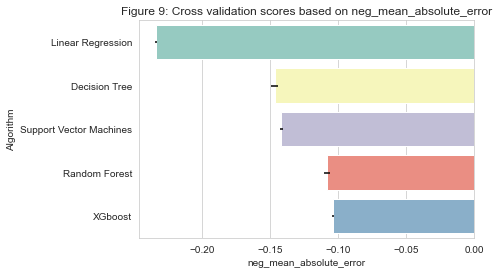

In [37]:
# run the defined function for neg_mean_absolute_error and show the results
nMAE = crossvalidation('neg_mean_absolute_error', 'Figure 9: ')
nMAE

neg_mean_squared_error               
                                 CrossValMeans CrossValerrors
Linear Regression                    -0.088907       0.000179
Decision Tree                        -0.047713       0.001713
Support Vector Machines              -0.037791       0.001276
Random Forest                        -0.023392       0.001079
XGboost                              -0.020358       0.000332

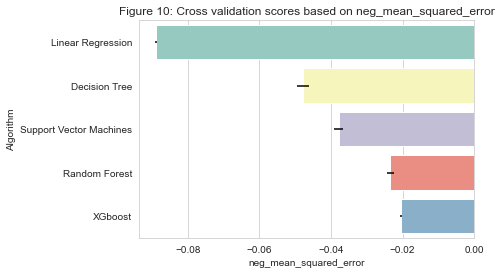

In [38]:
# run the defined function for neg_mean_squared_error and show the results
nMSE = crossvalidation('neg_mean_squared_error', 'Figure 10: ')
nMSE

neg_root_mean_squared_error               
                                      CrossValMeans CrossValerrors
Linear Regression                         -0.298173       0.000300
Decision Tree                             -0.217924       0.003152
Support Vector Machines                   -0.194371       0.003265
Random Forest                             -0.152902       0.003558
XGboost                                   -0.142676       0.001162

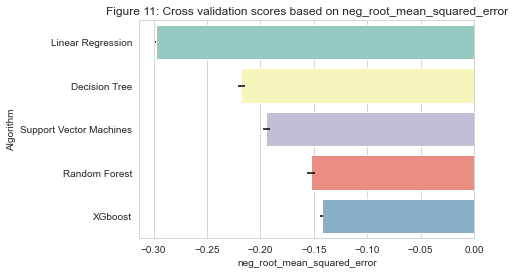

In [39]:
# run the defined function for neg_root_mean_squared_error and show the results
nRMSE = crossvalidation('neg_root_mean_squared_error', 'Figure 11: ')
nRMSE

r2               
                        CrossValMeans CrossValerrors
Linear Regression            0.484621       0.003085
Decision Tree                0.726508       0.007983
Support Vector Machines      0.780977       0.006045
Random Forest                0.864410       0.006161
XGboost                      0.882000       0.001313

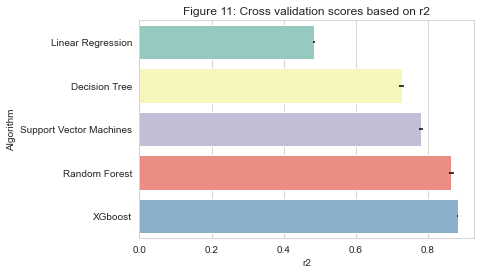

In [40]:
# run the defined function for R2 and show the results
R2 = crossvalidation('r2', 'Figure 11: ')
R2

<div class="alert alert-success">
<b>Insights from the Cross Validation:</b> 

Noticed that for negative MAE, MSE, RMSE, the one with highest value/shortest bar in the chart is the winner.

- XGBoost outperforms the Random Forest and becomes the winner for the trainning dataset; however, the gap between Random Forest and XGboost is very small.
    
- The performence of other models is still far behind the XGBoost and Random Forest.
   
Conclusively, it's advised to only tune RandomForest and XGboost, and give up the other models due to the huge computational costs.
</div>

# 5. Fine-tune the Selected Models

In this section, we use hyperparameter Tuning to get the best parameters for our models, and finally combine the best models to a maximum solution.

**Objectives:**

- Finding best model parameters, using RandomizedSearchCV and GridSearchCV.
- Forcuing on the MSE as the scoring method, since it is commonly used in this kind of scenario.
- Using default parameters as a starting point, relying on the sklearn documentation to determine the parameter range to test.
- Combine our best models by averaging them.

## 5.1. Tuning the Random Forest

### 5.1.1. Examine the Default Random Forest to Determine Parameters

In [41]:
# print the parameters that the default model is using
print('Parameters currently in use:\n')
pprint(RandomForest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}


### 5.1.2. Randomized Search with Cross Validation

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'log2','sqrt']
# Maximum number of levels in tree
max_depth = [150, 200, 250, 300]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# previewing the parameters for tuning
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [150, 200, 250, 300, None],
 'max_features': ['auto', 'log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 5],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


<div class="alert alert-warning">    
<b> Minding the tradeoff:</b> 
      
- More iterations will cover wider search spaces; however, the running time will be also increased.
- More cross validation folds decreases the chances of model overfitting; however, the running time will be also increased.

Thus, we will use 3 fold cross validation (cv = 3), search across 100 different combinations (n_iter = 100), and use all cores (n_jobs = -1).
</div>

In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 22)
# tuning with RandomizedSearch, setting parameters
rf_random = RandomizedSearchCV(estimator = rf,
                             param_distributions = random_grid, 
                             n_iter = 100, cv = 3, verbose=2, 
                             random_state=22, n_jobs = -1,scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 31.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=22),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [150, 200, 250, 300, None],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=22, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
# viewing the best parameters
rf_random_best = rf_random.best_params_
rf_random_best

{'n_estimators': 2000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 200,
 'bootstrap': False}

'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 250,
 'bootstrap': False}

In [45]:
# define a function that return the scoring results by inputing the fitted model and its name
def tuning_results(fitted, model_name):
    # collecting the mean score of MSE as a dataframe
    cv_results = pd.DataFrame(fitted.cv_results_).loc[:, 'mean_test_score':'rank_test_score']
    # rename the index
    cv_results.index = np.where(cv_results['rank_test_score']==1, model_name, cv_results.index)
    # rename the column
    cv_results = cv_results.rename(columns={'mean_test_score':'mean_Negative_MSE'}).sort_values(by=['rank_test_score'])
    # return the table with only the row with lowest mean MSE 
    return cv_results[0:1]

In [46]:
# show the tuning scoring results
RanSearch_RdForest = tuning_results(rf_random,'RanSearch_RdForest')
RanSearch_RdForest
results(rf_random.predict(X_test),'Random Forest (test)','test')
nMSE[3:4]

,mean_Negative_MSE,std_test_score,rank_test_score
RanSearch_RdForest,-0.021042,0.000517,1


,Random Forest (test)
MAE,0.090710
MSE,0.015943
RMSE,0.126265
R2,0.902516


neg_mean_squared_error               
                       CrossValMeans CrossValerrors
Random Forest              -0.023392       0.001079

### 5.1.2. Combine Grid Search To a Maximum Solution

We can now perform grid search building on the result from the random search. We will test a range of hyperparameters around the best values returned by random search.

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [220, 250, 270],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1],
    'min_samples_split': [2,3],
    'n_estimators': [2000, 2200]}
# Create a based model
rf = RandomForestRegressor(random_state = 22)
# Instantiate the grid searc1h model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
# show the best parameters
grid_search_best = grid_search.best_params_
grid_search_best

In [ ]:
# show the tuning scoring results
GridSearch_RdForest = tuning_results(grid_search,'GridSearch_RdForest')#.head(1).rename(index={18:'rf_random'})
GridSearch_RdForest
results(rf_random.predict(X_test),'Random Forest (test)','test')

<div class="alert alert-success">
<b>Insights from the tuning resutls of Random Forest :</b> 

From the results for training data above, we can say that the hyperparameter tuning is working, although the improvement is limited. 
    
The key points:

- The observable improvement shows that the parameters of the default model is problematic.
- A very slight improvement in nMSE after the grid search indicating that the returns from tuning is diminishing to zero. 

Thus, the room for model improvement is little and we can use it as our final Random Forest model.
    
</div>

In [ ]:
# use the result of grid search as our best model
RdForest_best = grid_search

## 5.2.1 Tuning the XGboost

### 5.1.1. Examine the Default XGboost to Determine Parameters

In [ ]:
# print the default model parameters
print('Parameters currently in use:\n')
pprint(XGboost.get_params())

In [ ]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 500, num = 10)] 
# setting learning_rate range
learning_rate = [0.01, 0.03, 0.05, 0.1, 0.25]
# Subsample ratio of the training instances, lower = preventing overfitting
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# set seed
seed = [22]
# the subsample ratio of columns: when constructing each tree; for each level; for each node (split)
colsample_bytree = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bynode = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bylevel = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# Minimum sum of instance weight (hessian) needed in a child
min_child_weight = [0.5, 1.0, 3.0, 5.0, 7.0, 10.0]
# the larger, the more conservative for the model
gamma = [0, 0.25, 0.5, 1.0]
# L1 AND L2 regularization term on weights
reg_alpha = [0.1, 1.0, 5.0, 10.0, 30, 50.0, 100.0]
reg_lambda = [0.1, 1.0, 5.0, 10.0, 30, 50.0, 100.0]
# Specify the learning task 
objective = ['reg:squarederror', 'reg:squaredlogerror']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Create the xgboost grid
xgboost_grid = {
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'subsample': subsample,
        'seed' : seed,
        'colsample_bytree': colsample_bytree,
        'colsample_bynode': colsample_bynode,
        'colsample_bylevel': colsample_bylevel,
        'min_child_weight': min_child_weight,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'objective': objective,
        'n_estimators': n_estimators}
# print the parameter lists
pprint(xgboost_grid)

In [ ]:
# random grid to search for best hyperparameters
# create the basic model to tune
xgboost=XGBRegressor(seed = 22)
xgboost_RS = RandomizedSearchCV(estimator = xgboost,
                             param_distributions = xgboost_grid, 
                             n_iter = 100, cv = 3, verbose=2, 
                             random_state=22, n_jobs = -1,scoring='neg_mean_squared_error')
# Fit the random search model
xgboost_RS.fit(X_train,y_train)

In [ ]:
# show the best parameters
xgboost_RS_best = xgboost_RS.best_params_
xgboost_RS_best

In [ ]:
# show the tuning scoring results
RanSearch_xgb = tuning_results(xgboost_RS,'RanSearch_XGBoost')
RanSearch_xgb
nMSE
results(xgboost_RS.predict(X_test),'Random Forest (test)','test')

### 5.2.2. Combine Grid Search To a Maximum Solution

In [ ]:
# Create the parameter grid based on the results of random search 
xgboost_grid = {
        'max_depth': [150, 170],
        'learning_rate': [0.25],
        'subsample': [0.8],
        'seed' :[22],
        'colsample_bytree': [1],
        'colsample_bynode': [0.7],
        'colsample_bylevel': [0.5],
        'min_child_weight': [5],
        'reg_alpha': [1],
        'n_estimators': [500, 700, 1000, 1500]}

pprint(xgboost_grid)
# Create a based model
xgboost=XGBRegressor(seed = 22)
# Instantiate the grid search model
xgboost_gsearch = GridSearchCV(estimator = xgboost, param_grid = xgboost_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
# Fit the grid search to the data
xgboost_gsearch.fit(X_train,y_train)

In [ ]:
# show the best parameters
xgboost_gsearch_best = xgboost_gsearch.best_params_
xgboost_gsearch_best

In [ ]:
# show the tuning scoring results
GridSearch_xgb = tuning_results(xgboost_gsearch,'RanSearch_XGBoost')
GridSearch_xgb
results(xgboost_gsearch.predict(X_test),'Random Forest (test)','test')

<div class="alert alert-success">
<b>Insights from the tuning resutls of the XGBoost :</b> 

From the results above, the hyperparameter tuning is working very effeciently for training data and especially for testing data. 
    
Here's the key points:

- The improvement of results from default model to Randomized Search is remarkable, showing that the default model is problematic.
- A  slight improvement in KPIs of the grid search results indicating that the returns from tuning is diminishing. 

Thus, the room for model improvement is little and we can use it as our final XGboost model.
    
</div>

In [ ]:
# use the result of grid search as our final best model
XGboost_best = xgboost_gsearch

## 5.3. Comparing the Results

In [ ]:
# building plot for feature importance for each model
def feature_importance(regressor, name):
# setting up the frame
    fig, axes = plt.subplots(figsize=(8,15))
# setting up parameters
    indices = np.argsort(regressor.feature_importances_)[::-1][:30]
# ploting feature importance
    g = sns.barplot(y=X_train.columns[indices][:30],
                x = regressor.feature_importances_[indices][:30],
                orient='h')
# labeling
    g.set_xlabel("Relative importance",fontsize=15)
    g.set_ylabel("Features",fontsize=15)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance");

In [ ]:
# plotting the feature importance for both of the best models
feature_importance(RdForest_best.best_estimator_, 'Figure 12: Random Forest Best Model:')
feature_importance(XGboost_best.best_estimator_, 'Figure 13: XGBoost Best Model:')

<div class="alert alert-success">
<b>Insights from Figure 12 and 13 :</b> 
    
- The top 5 features for random_forest are the sales of differnt avocados (small_packs and small_avocados, etc), which seem to be reasonable because from the correlation matricx (Figure_8) those are the most correlated features with the prices. 
    
- Nevertheless, for the XGBoost, its most important feature is whether the region is Sanfrancisco. This interesting result implies that this city could be actually a super influential outlier. Also, from Figure_6&7 we can see that Sanfrancisco has the top avocado prices with high variance.
    
- However, although dropping this region may make our model more efficient, the computational cost is too high and we are also running out of memory.

- For both models, both small avocados and small packs are of top importance, this implies that the small ones are more welcomed than the large and xlarge ones.

</div>

## 5.4. Ensemble Modeling

Since we have two best regressors, we can combine them to create the final regressor using

In [ ]:
def mse_cv(model):
    kf = KFold(3, shuffle=True, random_state=22).get_n_splits(X_train.values)
    mse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(mse)

In [ ]:
voting = VotingRegressor(estimators=[('Random Forest', RdForest_best), ('XGBoost', XGboost_best)], n_jobs=-1)

voting = voting.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('Random Forest', RdForest_best),
              ('XGBoost', XGboost_best)]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=XGboost_best, cv = 1,n_jobs=-1)

stacking_regressor.fit(X_train, y_train)

<div class="alert alert-success">
    

</div>

In [ ]:
Final = votingC.predict(X_test)
Final_Result = results(stack,'Final Model','test')

pd.concat([XGBdefault_test, 
           XGB_RdSearch_test, 
           XGB_gsearch_test,Final_Result], axis=1).transpose()

# 6. Conclusion

The final avocado price prediction is impressive, showing that our model is running efficiently in predicting unknown data. During the model training, we have found several interested points, including that the avocado price is even more sensitive to some regions like the Sanfrancisco than its sales data. Further exploratory analysis can be done for these regions to dig some business insights. Also, in terms of modeling, although the current result is impressive, more advanced model including clustering and recurrent neural nets can be added to the base models. Whatsmore, if there is enough computational power, hyperparameter tuning and model stacking can be applied for all base models which could even improve the model accuracy hgiher.